In [18]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
df = pd.read_csv('dados_produtos.csv',sep=',') # importa a base de dados

In [20]:
df.head(10) # mostra nosso data frame


,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
5,Celular,3.98,1413,0
6,iPod,3.50,1907,0
7,Notebook,4.76,3857,0
8,Videogame,3.94,2800,1
9,Televisão,4.68,2600,0


In [21]:
# contagem de quantos realmente compragem
df['purchased'].value_counts() # value counts realiza a contagem dos elementos de uma coluna


purchased
1    55
0    45
Name: count, dtype: int64

In [22]:
df.describe()#descrição do nosso data frame

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


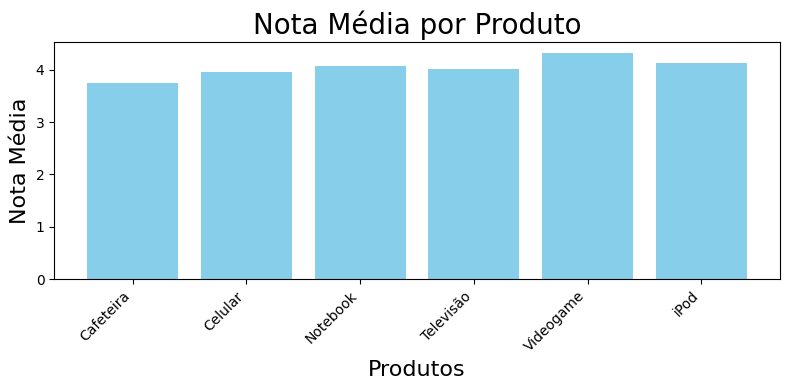

In [23]:
# Calcular a média das notas por produto
notasprodutos = df.groupby('product_name')['rating'].mean().reset_index()

# Renomear colunas 
notasprodutos.columns = ['Produto', 'Nota Média']

# Criar gráfico
plt.figure(figsize=(8, 4))
plt.bar(notasprodutos['Produto'], notasprodutos['Nota Média'], color='skyblue')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Nota Média', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Nota Média por Produto", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

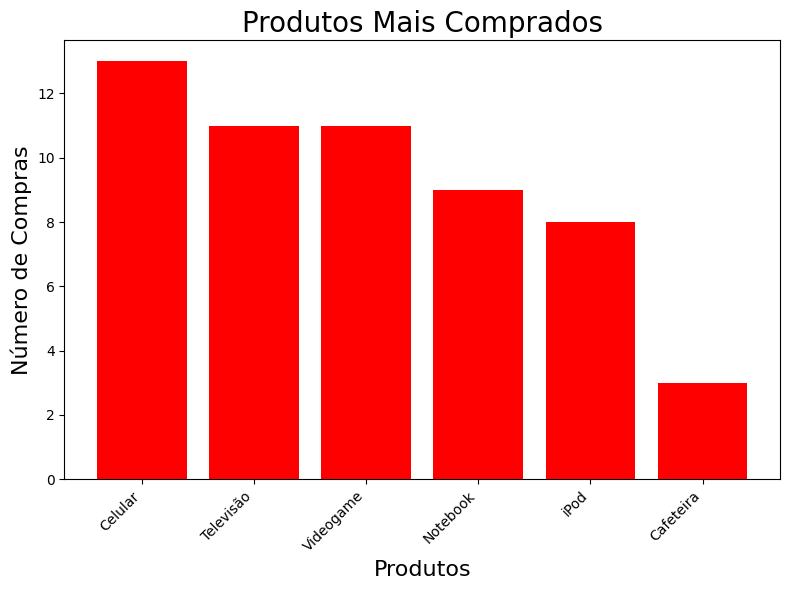

In [24]:


# Calcular a contagem de produtos comprados
produtos_comprados = df[df['purchased'] == 1]
contagem_produtos = produtos_comprados['product_name'].value_counts().reset_index()

# Renomear colunas
contagem_produtos.columns = ['Produto', 'Contagem']

# Criar gráfico
plt.figure(figsize=(8, 6))
plt.bar(contagem_produtos['Produto'], contagem_produtos['Contagem'], color='red')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Número de Compras', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Produtos Mais Comprados", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


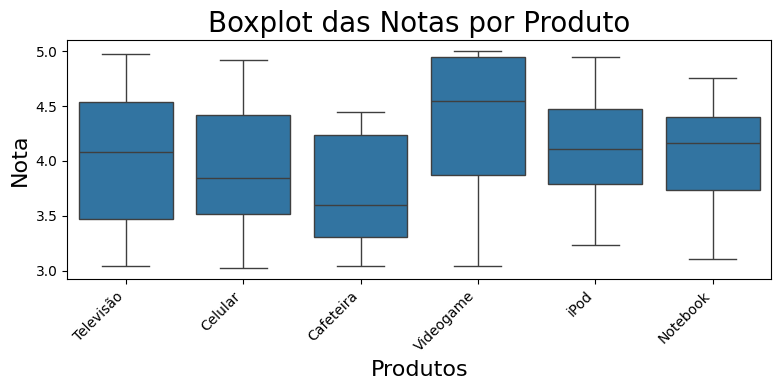

In [25]:
#criação do bloxplot por cada produto
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='product_name', y='rating')

# configurações do gráfico
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Nota', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Boxplot das Notas por Produto", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

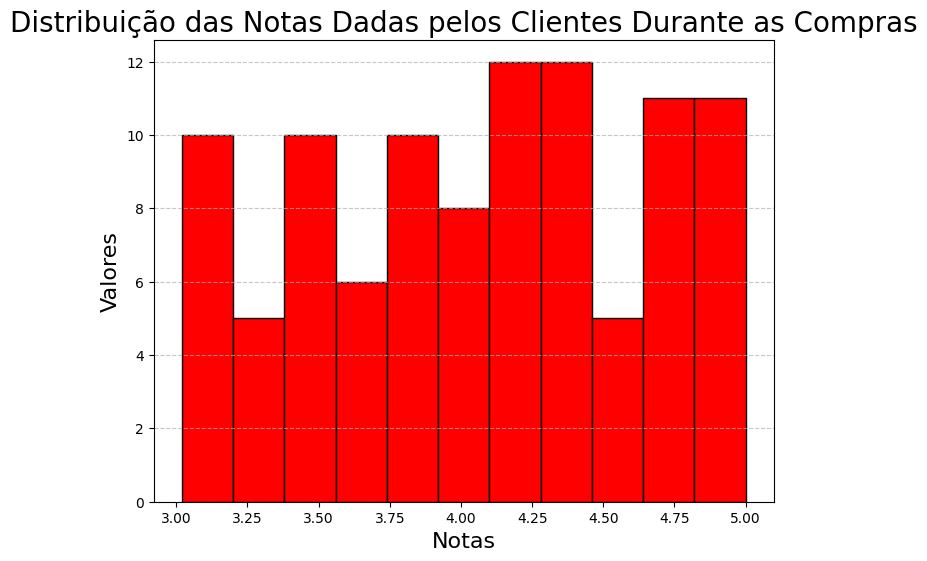

In [26]:

# criar gráfico de histograma
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=11, edgecolor='black', color='red')  # Ajuste 'avaliacao_compra' para 'rating' se necessário
plt.title('Distribuição das Notas Dadas pelos Clientes Durante as Compras', fontsize=20)
plt.xlabel('Notas', fontsize=16)
plt.ylabel('Valores', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



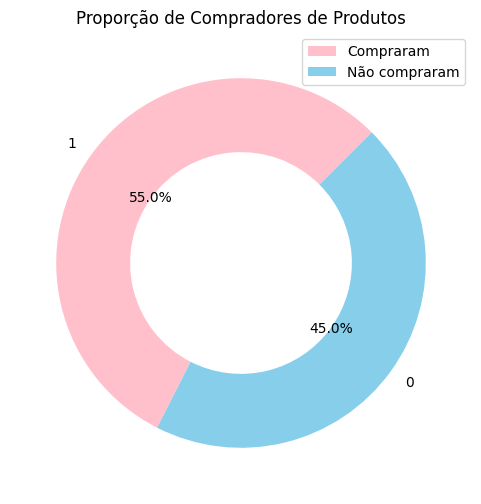

In [39]:
# Calcular a proporção de compradores
proporcao_compradores = df['purchased'].value_counts(normalize=True)

# Cores para o gráfico de pizza
cores_invertidas = ['pink', 'skyblue']

# Visualização
plt.figure(figsize=(6, 6))
plt.pie(proporcao_compradores, labels=proporcao_compradores.index, autopct='%1.1f%%',
        startangle=45, colors=cores_invertidas, wedgeprops=dict(width=0.4))
plt.title('Proporção de Compradores de Produtos')
plt.legend(['Compraram', 'Não compraram'], loc='upper right')
plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [29]:
# Dividir os dados 
X = df[['rating', 'rating_count']]
y = df['purchased']

# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Criar o modelo
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

Produto: Televisão
Acurácia: 0.50
              precision    recall  f1-score   support

Não Comprado       0.33      1.00      0.50         1
    Comprado       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



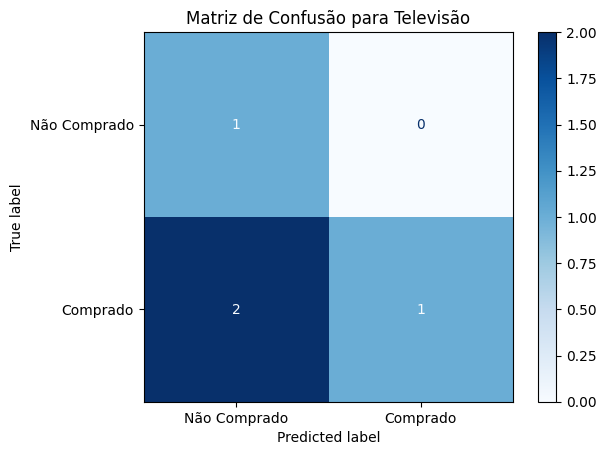

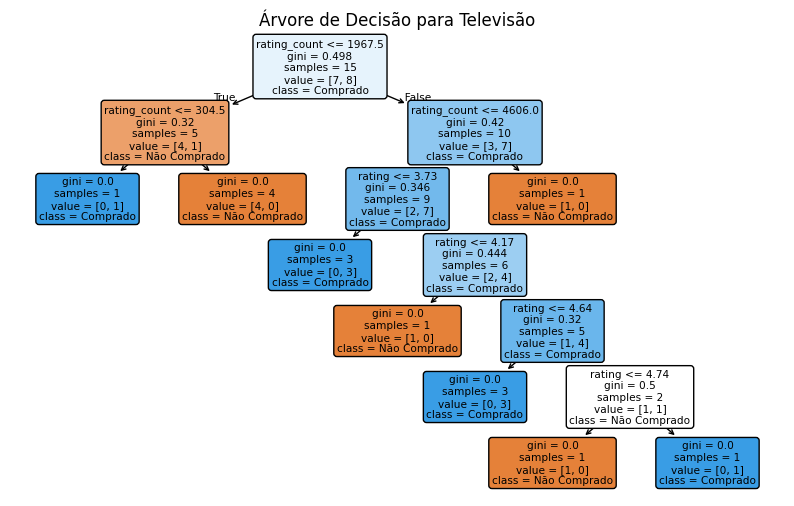

Produto: Celular
Acurácia: 0.60
              precision    recall  f1-score   support

Não Comprado       1.00      0.33      0.50         3
    Comprado       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



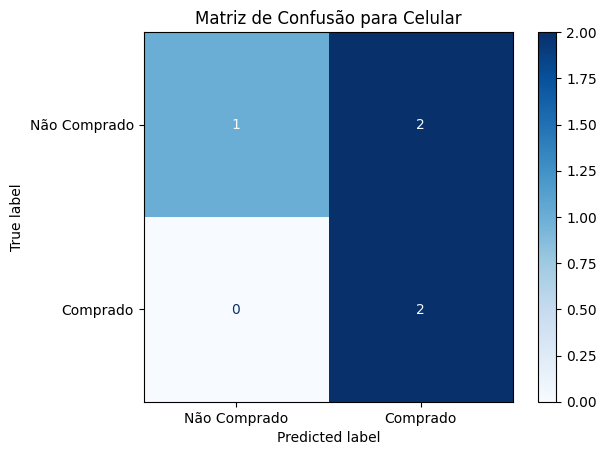

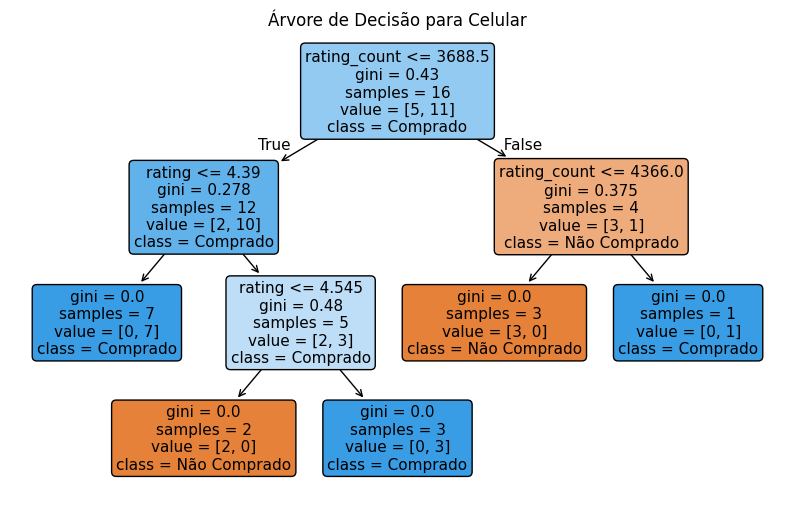

Produto: Cafeteira
Acurácia: 0.50
Apenas uma classe prevista para Cafeteira. Não é possível calcular o relatório de classificação.


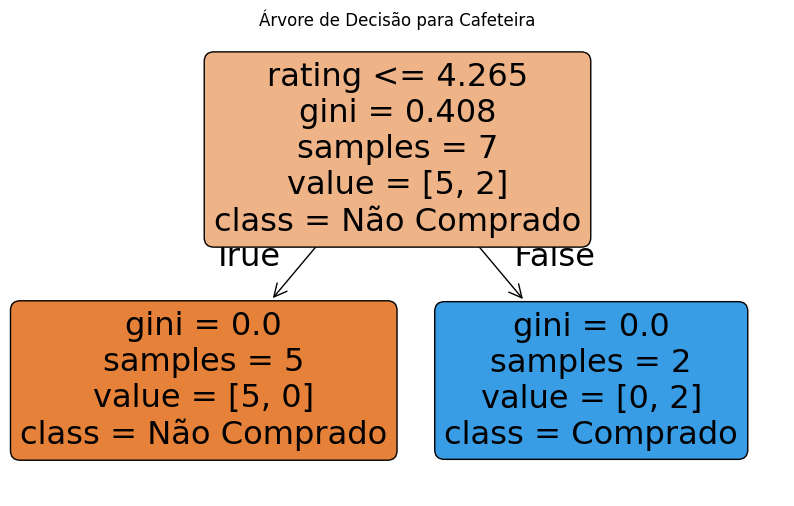

Produto: Videogame
Acurácia: 1.00
Apenas uma classe prevista para Videogame. Não é possível calcular o relatório de classificação.


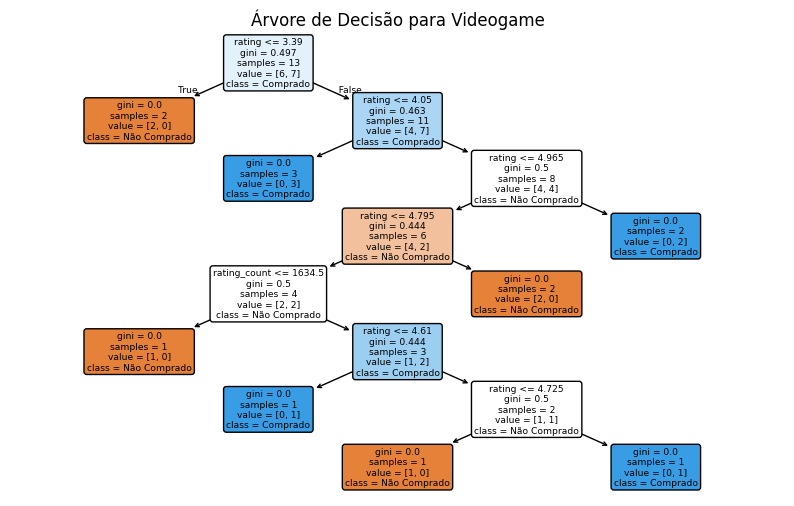

Produto: iPod
Acurácia: 0.50
              precision    recall  f1-score   support

Não Comprado       0.50      0.50      0.50         2
    Comprado       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



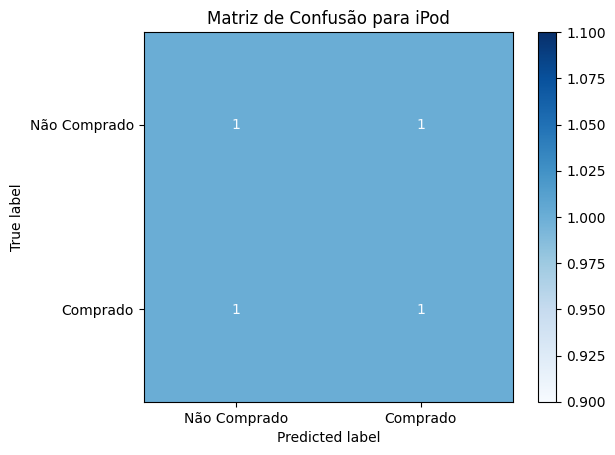

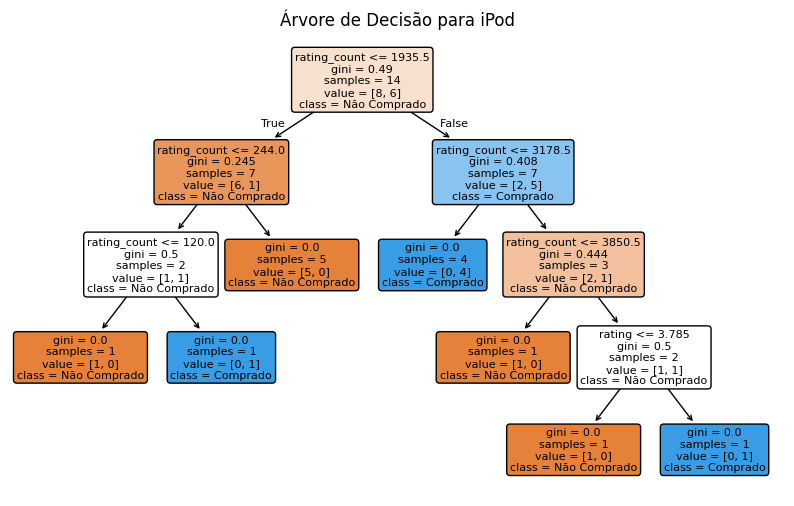

Produto: Notebook
Acurácia: 0.75
              precision    recall  f1-score   support

Não Comprado       1.00      0.67      0.80         3
    Comprado       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



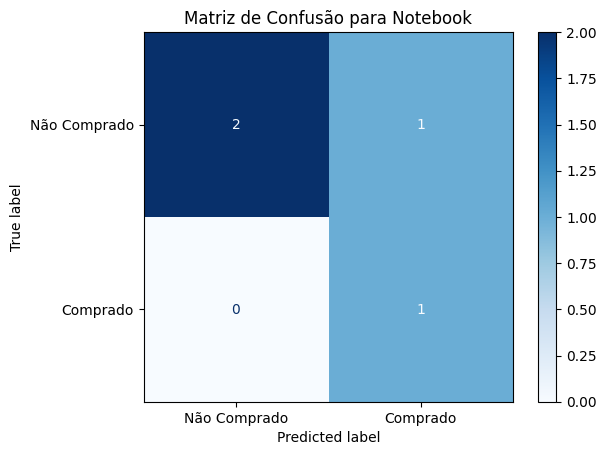

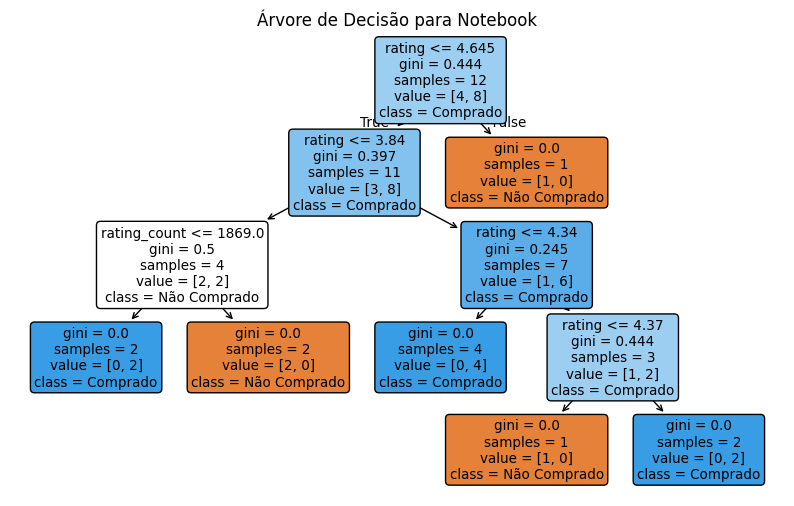

In [38]:
# Obter produtos únicos
produtos = df['product_name'].unique()

# Criar e avaliar um modelo de árvore de decisão para cada produto
for produto in produtos:
    # Filtrar os dados para o produto específico
    df_produto = df[df['product_name'] == produto]

    # Verificar se há dados suficientes para treinamento
    if df_produto.shape[0] < 2:
        print(f'Produto {produto} não tem dados suficientes para treinar o modelo.')
        continue

    # Definir características e alvo
    X = df_produto[['rating', 'rating_count']]
    y = df_produto['purchased']

    # Dividir em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Criar e treinar o modelo de árvore de decisão
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Avaliar o modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Produto: {produto}')
    print(f'Acurácia: {accuracy:.2f}')

    # Verificar as classes presentes nas previsões
    unique_classes = set(y_pred)
    if len(unique_classes) == 2:
        report = classification_report(y_test, y_pred, target_names=['Não Comprado', 'Comprado'])
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(report)

        # Exibir a matriz de confusão
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Não Comprado', 'Comprado'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Matriz de Confusão para {produto}')
        plt.show()
    else:
        print(f'Apenas uma classe prevista para {produto}. Não é possível calcular o relatório de classificação.')

    # Visualizar a árvore de decisão
    plt.figure(figsize=(10, 6))
    plot_tree(model, feature_names=['rating', 'rating_count'], 
              class_names=['Não Comprado', 'Comprado'], 
              filled=True, rounded=True)
    plt.title(f'Árvore de Decisão para {produto}')
    plt.show()